In [1]:
#importing the libraries that ill use 
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()
import json

In [3]:
##
#Part 1 - Personal Finance Planner
#Collect Crypto Prices Using the requests Library

# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
bitcoin_data = requests.get(btc_url).json()
etherum_data = requests.get(eth_url).json()

bitcoin_current_value = round(bitcoin_data["data"]["1"]["quotes"]["CAD"]["price"],2)
ethereum_current_value = round(etherum_data["data"]["1027"]["quotes"]["CAD"]["price"],2)

print(f" You have ${my_btc*bitcoin_current_value} BTC")
print(f" You have ${my_eth*ethereum_current_value} ETH")

 You have $83161.572 BTC
 You have $12357.109 ETH


In [6]:
#Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)
# Current amount of shares
my_agg = 200
my_spy = 50
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")\
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
# Format current date as ISO format
today = pd.Timestamp("2021-03-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Preview DataFrame
# YOUR CODE HERE!
portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df
portfolio.head()

AGG                                         SPY  \
                             open      high     low   close    volume    open   
time                                                                            
2021-03-01 00:00:00-05:00  114.97  115.5899  114.89  115.13  12546198  385.59   

                                                              
                             high      low   close    volume  
time                                                          
2021-03-01 00:00:00-05:00  390.92  380.572  389.52  92437154

In [8]:
#Gather the data needed 
#agg_close_price =(portfolio["AGG"]["close"],)
#spy_close_price =(portfolio["SPY"]["close"],)
# Print AGG and SPY close prices
#print(f"Current AGG closing price: ${agg_close_price}")
#print(f"Current SPY closing price: ${spy_close_price}")


# Pick AGG and SPY close prices
#agg_close_price = (df_portfolio["AGG"]["close"])
#spy_close_price = (df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
#print(f"Current AGG closing price: ${agg_close_price}")
#print(f"Current SPY closing price: ${spy_close_price}")



# Pick AGG and SPY close prices
agg_close_price = float(portfolio["AGG"]["close"])
spy_close_price = float(portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")





Current AGG closing price: $115.13
Current SPY closing price: $389.52


In [9]:
# Compute the current value of shares
spy_value = my_spy * spy_close_price
agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value}")  #TO WHOEVER MARKINGG***** I couldnt run the :.02 to round it for some reason it kept giving me an error 
                                                                            # thats why the output looks a bit messy sorry 
print(f"The current value of your {my_agg} AGG shares is ${agg_value}")

The current value of your 50 SPY shares is $19476.0
The current value of your 200 AGG shares is $23026.0


In [10]:
# Savings Health Analysis

# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
savings_df = pd.DataFrame(columns = ["amount"], index = ["crypto", "shares"])
savings_df["amount"]["crypto"] = bitcoin_current_value + ethereum_current_value
savings_df["amount"]["shares"] = spy_value + agg_value
savings_df.head()

,amount
crypto,71632.84
shares,42502.00


array([<AxesSubplot:ylabel='amount'>], dtype=object)

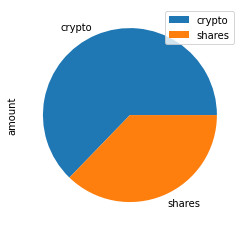

In [11]:
savings_df.plot.pie(subplots = True)

In [12]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = savings_df["amount"]["crypto"] + savings_df["amount"]["shares"]

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations, you have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print(f"Congratulations, you have enough money in your emergency fund")
elif total_savings < emergency_fund:
    print("You DO NOT have enough in your emergency fund, time to start rethinking your life")

Congratulations, you have enough money in your emergency fund


In [13]:
#Part 2 - Retirement Planning

#Monte Carlo Simulation
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
# Get data for past 5 years for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  298252778  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.16  261233795  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  302880969  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249

In [14]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_30yrs.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.838393e-01,9.879355e-01,9.919719e-01,9.864113e-01,9.946111e-01,1.008759e+00,1.004821e+00,1.030348e+00,9.988721e-01,9.971980e-01,...,1.005301e+00,9.954715e-01,1.029533e+00,1.000225e+00,9.990044e-01,1.008469e+00,9.963318e-01,1.011861e+00,9.857172e-01,9.999128e-01
2,1.004819e+00,9.977506e-01,1.010891e+00,9.768180e-01,9.890736e-01,1.020858e+00,1.017750e+00,1.021344e+00,1.015748e+00,1.011055e+00,...,1.016227e+00,9.904327e-01,1.042886e+00,9.946657e-01,1.002720e+00,1.022850e+00,9.851229e-01,9.996859e-01,9.705216e-01,9.786615e-01
3,1.014916e+00,1.018119e+00,1.025769e+00,9.785102e-01,1.008331e+00,1.017390e+00,1.031150e+00,1.015289e+00,1.011438e+00,1.002380e+00,...,1.035928e+00,9.910342e-01,1.024500e+00,1.006493e+00,1.000674e+00,1.035961e+00,9.910049e-01,1.015881e+00,9.897297e-01,9.425173e-01
4,1.010423e+00,1.043777e+00,1.024075e+00,9.926287e-01,1.017174e+00,1.021932e+00,1.036721e+00,1.018482e+00,1.007282e+00,1.017901e+00,...,1.039231e+00,9.822190e-01,1.015314e+00,1.040207e+00,1.013228e+00,1.040209e+00,9.884941e-01,1.006338e+00,9.859408e-01,9.329712e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.005708e+07,2.833852e+08,4.541350e+07,2.093296e+08,5.962555e+07,1.266475e+08,7.597384e+07,1.323570e+07,9.882768e+07,1.608974e+07,...,2.550423e+07,1.539821e+08,1.581121e+09,2.377143e+08,4.529910e+08,6.516516e+07,3.227440e+08,6.068618e+07,1.165528e+08,2.591569e+08
7557,5.042918e+07,2.858160e+08,4.501582e+07,2.081999e+08,5.939044e+07,1.250283e+08,7.412301e+07,1.307893e+07,9.875544e+07,1.596837e+07,...,2.572600e+07,1.570858e+08,1.600154e+09,2.357087e+08,4.474749e+08,6.486966e+07,3.180954e+08,6.027891e+07,1.174584e+08,2.620170e+08
7558,5.075233e+07,2.865583e+08,4.546391e+07,2.089226e+08,5.904538e+07,1.259331e+08,7.296494e+07,1.320602e+07,9.975278e+07,1.582980e+07,...,2.572040e+07,1.627155e+08,1.626668e+09,2.324828e+08,4.457009e+08,6.481510e+07,3.205406e+08,5.906109e+07,1.187183e+08,2.590159e+08
7559,5.087916e+07,2.879323e+08,4.578362e+07,2.085463e+08,5.965951e+07,1.256274e+08,7.273330e+07,1.327418e+07,1.024314e+08,1.588497e+07,...,2.544171e+07,1.660961e+08,1.664425e+09,2.337345e+08,4.469137e+08,6.702292e+07,3.192577e+08,5.825234e+07,1.191065e+08,2.566200e+08


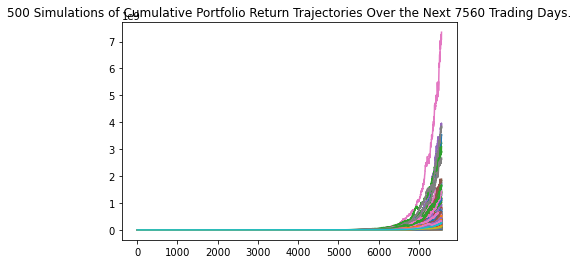

In [19]:
# Plot simulation outcomes
mc_sim_line_plot = MC_30yrs.plot_simulation()

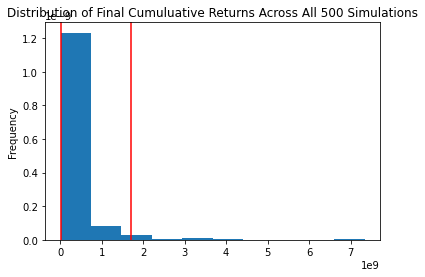

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30yrs.plot_distribution()

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_30yrs.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           5.000000e+02
mean            3.301411e+08
std             5.815009e+08
min             8.053037e+06
25%             7.986541e+07
50%             1.643328e+08
75%             3.112847e+08
max             7.344549e+09
95% CI Lower    1.618115e+07
95% CI Upper    1.702788e+09
Name: 7560, dtype: float64


In [22]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics[8]*initial_investment,2)
ci_upper = round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $323622949365.94 and $34055754976774.09


In [23]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.
 # Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_statistics[8]*initial_investment,2)
ci_upper = round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $485434424048.9 and $51083632465161.14
